In [1]:
import seaborn as sns
import pandas as pd
import pymc3 as pm
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

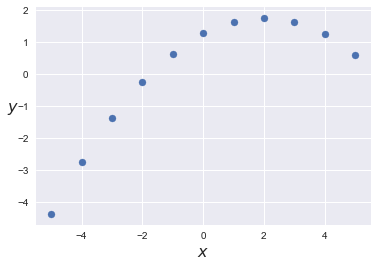

In [9]:
ans = sns.load_dataset('anscombe')
x_2 = ans[ans.dataset == 'II']['x'].values
y_2 = ans[ans.dataset == 'II']['y'].values
x_2 = x_2 - x_2.mean()
y_2 = y_2 - y_2.mean()
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

In [5]:
ans = sns.load_dataset('anscombe')
x_2 = ans[ans.dataset == 'II']['x'].values
y_2 = ans[ans.dataset == 'II']['y'].values

         Current function value: -42.438655
         Iterations: 42
         Function evaluations: 132
         Gradient evaluations: 120


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:05<00:00, 557.65it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCBA87A208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DCBAB62BA8>]], dtype=object)

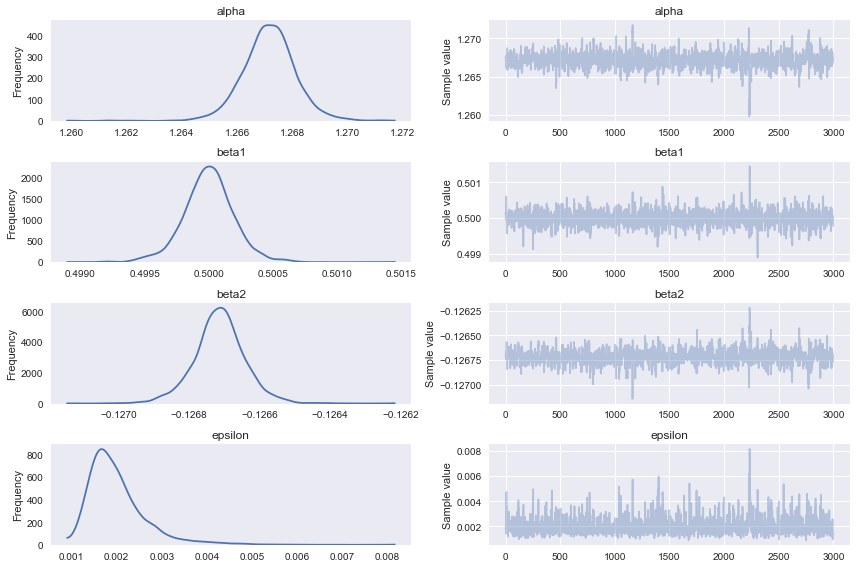

In [11]:
with pm.Model() as poly_reg_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=1)
    beta2 = pm.Normal('beta2', mu=0, sd=1)
    epsilon = pm.Uniform('epsilon', lower=0, upper=10)
    
    mu = alpha + beta1 * x_2 + beta2 * x_2**2
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_2)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_poly = pm.sample(3000, step=step, start=start)
pm.traceplot(trace_poly)

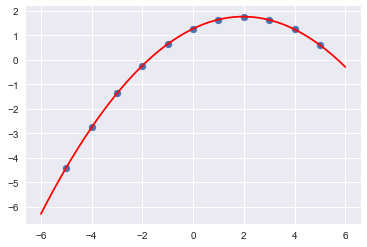

In [12]:
x_p = np.linspace(-6, 6)
y_p = trace_poly['alpha'].mean() + trace_poly['beta1'].mean() * x_p + trace_poly['beta2'].mean() * x_p**2
plt.scatter(x_2, y_2)
plt.plot(x_p, y_p, c='r')